In [100]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np

In [101]:
#read Gold Price
gold_data = pd.read_csv('gold price.csv')
gold_data.head()
gold_data.columns=['date','gold price']

Our team suspect existence of some kind of inverse relationship between the global 

gold price and an opaque currency value. The supporting reason behind this hypothesis is that, 

when gold price rises, which means people invests more on the capital goods and less on the 

commercial good which causes decrease in the quantity demand for the oil; since the quantity 

demand for the oil decrease, according to the positive-slope supply function, the oil price 

should decrease. For an opaque country, whose main economy part is oil export, it’s amount of 

oil export should go down. To stimulate the oil export and promote the its economic growth, 

the value of the country’s currency should depreciate. Based on this economic-conceptual 

induction, global price of gold and an opaque country’s currency exchange rate should be 

inversely related.

In [102]:
#read Exchange Rate
exchange_data = pd.read_csv('Exchange Rate.csv',skiprows=4)

In [103]:
# Select out the exchange rate between US Dollar and Saudi Arabian Riyal\
# which is a leading Opaque Country's currency 

USD_SAR = exchange_data[['End Date','USD/SAR']]

In [104]:
USD_SAR.columns = ['date','USD/SAR']

In [105]:
gold_data['date'] = pd.to_datetime(gold_data.date)
USD_SAR = USD_SAR[:9504]
USD_SAR['date'] = pd.to_datetime(USD_SAR.date)


In [106]:
# combine the exchange rate data and gold price data using function 'pd.merge"
combine_data = pd.merge(gold_data, USD_SAR, on='date')


In [107]:
# Calculate the correlation (R-square value) of the gold price and exchange rate
combine_data['gold price'].corr(combine_data['USD/SAR'])

-0.22330800563035272

### negative value of correlation indicates that those two objects are negatively correlated.

In [108]:
n = combine_data['date'].size
combine_data['normalized gold price'] = \
(gold_data['gold price']- gold_data['gold price'].mean())/(gold_data['gold price'].std()/np.sqrt(n))
combine_data['normalized rate'] = \
(USD_SAR['USD/SAR']- USD_SAR['USD/SAR'].mean())/(USD_SAR['USD/SAR'].std()/np.sqrt(n))

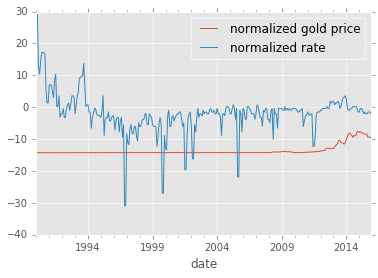

In [109]:
ax = combine_data.plot(x = 'date' , y = 'normalized gold price')
combine_data.plot(x = 'date', y = 'normalized rate', ax = ax)

In [110]:
combine_data['normalized gold price'].corr(combine_data['normalized rate'])

0.092165857090644163

### Since the R^2 value is smaller than 0.1, which indicates the chance that the gold price and the exchange rate are related is extremely low.

In [111]:
import statsmodels.formula.api as smf

In [112]:
x = combine_data['normalized gold price']
y = combine_data['normalized rate']

In [113]:
results = smf.OLS(y, x).fit()

In [114]:
results.rsquared

0.089557369045742519

Due to the extremem low value of gold price and currency, 

In [115]:
results.pvalues

normalized gold price    6.758036e-08
dtype: float64

In [116]:
pricein = pd.read_excel('Price Index.xls')

In [117]:
pricein.DATE = pd.to_datetime(pricein.DATE)

In [126]:
pricein.columns = ['date','value']

,date,value
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [119]:
com_in = pd.merge(combine_data,pricein,on = 'date')
n = com_in['date'].size
# normal lize the price index
com_in['value'] = \
(com_in['value']- com_in['value'].mean())/(com_in['value'].std()/np.sqrt(n))

construct the plot of normalized gold price and price index. From observation, the price index rises with a positive slope over the years while the gold price remains unchanged in times. 

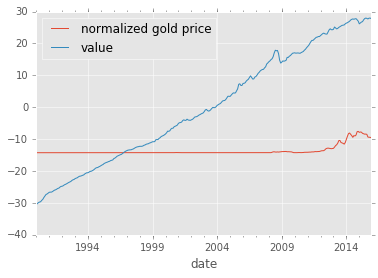

In [120]:
ax = com_in.plot(x = 'date' , y = 'normalized gold price')
com_in.plot(x = 'date', y = 'value', ax = ax)

#### After plotting the normlized gold price and the price index, I observed that gold price hardly change any over the years. This strength the results I got above that, it is very unlikely to gold price have any connection with exchange rate. 

In [121]:
com_in.value.mean()

-4.8883973791956894e-14

In [127]:
com_in2 = pd.merge(combine_data,pricein,on = 'date')
n = com_in['date'].size

In [129]:
com_in2.head()

,date,gold price,USD/SAR,normalized gold price,normalized rate,value
0,1990-01-01,410.118,3.7500,-14.254177,26.795716,127.5
1,1990-02-01,416.543,3.7500,-14.254177,29.059001,128.0
2,1990-03-01,393.661,3.7495,-14.254177,12.650187,128.6
3,1990-04-01,374.929,3.7501,-14.254177,10.386902,128.9
4,1990-05-01,368.855,3.7504,-14.254177,14.347650,129.1


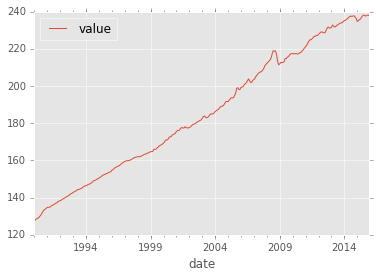

In [131]:
com_in2.plot(x = 'date', y = 'value')

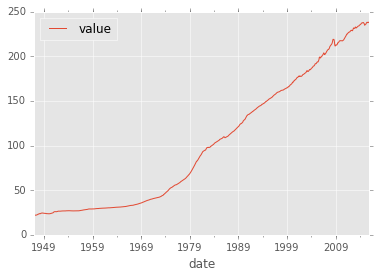

In [132]:
pricein.plot(x = 'date', y= 'value')